Implementacja *approximate matching* działająca w czasie $O(n \sqrt {k \log m} + n \log m)$. Najważniejsze pliki znajdują się w katalogu `lib`, główna część algorytmu jest w pliku `lib/match.h`. Kod algorytmów FFT i SuffixArray pochodzi z biblioteczki drużyny UWR (Agrawal, Górniak, Kwiecień).

## Testy
Testy generowane są przez programy umieszczone w katalogu `tests`. Wszystkie generatory przyjmują jako argumenty dwie liczby: ziarno i *m* (długość wzorca). Wszystkie generatory generują tekst o długości $n = 3m$. Opis generatorów:
- `cyclic`: $k = m/10, |\Sigma| = \sqrt m$. Wzorzec ma losowy okres długości $\sqrt k$. Tekst powstaje przez trzykrotne powtórzenie wzorca i zastąpienie niektórych liter losowymi (każdą z prawdopodobieństwem $0.1$)
- `cyclic_binomial`: Jak wyżej, ale znaki losowane są z rozkładem dwumianowym (z paramatrem $p = 1/2$), a nie jednostajnym
- `random_binary`: $k = m/2, \Sigma = \{ 0, 1 \}$. Wzorzec i tekst to losowe binarne ciągi
- `repeat_3_big_k`: $k = m/10, |\Sigma| = \sqrt m$. Losowy wzorzec. Tekst powstaje przez trzykrotne powtórzenie wzorca i zastąpienie niektórych liter losowymi (każdą z prawdopodobieństwem $m/k$)
- `repeat_3_mid_k`: Jak wyżej, tylko $k = \sqrt m$.
- `repeat_3_small_k`: Jak wyżej, tylko $k = min(10, m)$

### Sprawdzenie poprawności
Dla każdego z generatorów generowane jest 200 testów dla $m = 10$ i 100 dla $m = 1000$. Wyniki są porównywane z rozwiązaniem naiwnym działającym w czasie $O(nm)$.

In [17]:
!make run_tests

g++ -std=c++17 -Wall -Wextra -Wshadow -O2 lib/lcp.cpp lib/vectors.cpp lib/fft.cpp main.cpp -o main
for gen in tests/cyclic tests/cyclic_binomial tests/random_binary tests/repeat_3_big_k tests/repeat_3_mid_k tests/repeat_3_small_k tests/repeat_3_big_sigma; do \
	./test-output.sh $gen 200 10;  \
	./test-output.sh $gen 100 1000; \
done
tests/cyclic 10 ok
tests/cyclic 1000 ok
tests/cyclic_binomial 10 ok
tests/cyclic_binomial 1000 ok
Pliki out1 i out2 różnią się
tests/random_binary 196 10: failed
tests/random_binary 10 ok
tests/random_binary 1000 ok
tests/repeat_3_big_k 10 ok
tests/repeat_3_big_k 1000 ok
tests/repeat_3_mid_k 10 ok
tests/repeat_3_mid_k 1000 ok
tests/repeat_3_small_k 10 ok
tests/repeat_3_small_k 1000 ok
tests/repeat_3_big_sigma 10 ok
tests/repeat_3_big_sigma 1000 ok


### Pomiar czasu
Dla każdego rodzaju testów zmierzyłem średni czas działania w zależności od $m$ dla $m \in [100, 10000)$ porównując szybki i naiwny algorytm oraz pierwszą wersję algorytmu, która miała mniej zoptymalizowane parametry i działała w czasie $O(n \sqrt k \log m)$.

In [33]:
# make sure all programs are compiled
!make all

g++ -std=c++17 -Wall -Wextra -Wshadow -O2 lib/lcp.cpp lib/vectors.cpp lib/fft.cpp main_old.cpp -o main-old
g++ -std=c++17 -Wall -Wextra -Wshadow -O2 lib/lcp.cpp lib/vectors.cpp lib/fft.cpp string_test.cpp -o string-test
g++ -std=c++17 -Wall -Wextra -Wshadow lib/lcp.cpp lib/vectors.cpp lib/fft.cpp string_test.cpp -g -fsanitize=address -fsanitize=undefined -o string-test-debug


In [34]:
from matplotlib import pyplot as plt
from subprocess import run
import time
import numpy as np

In [35]:
def measure_time(generator, algorithm, m, tests, k=''):
    start = time.time()
    for i in range(tests):
        cmd = f'{generator} {i} {m} {k} | {algorithm} > /dev/null 2> /dev/null'
        run(cmd, shell=True)
    end = time.time()
    return (end - start) / tests

In [36]:
def plot_time(generator, tests):
    for algorithm in ['./main', './main-old', './naive']:
        ms = np.linspace(5, 10000, 50, dtype=int)
        times = [measure_time(generator, algorithm, m, tests) for m in ms]
        plt.plot(ms, times, label=algorithm)
    plt.legend()

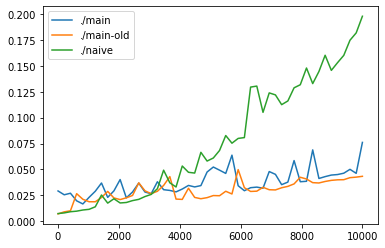

In [37]:
plot_time('tests/cyclic', 5)

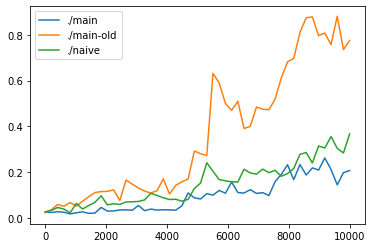

In [38]:
plot_time('tests/cyclic_binomial', 5)

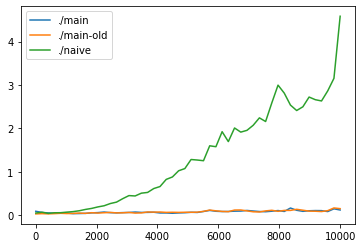

In [39]:
plot_time('tests/random_binary', 5)

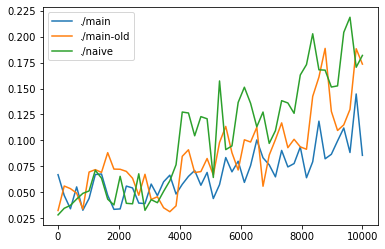

In [40]:
plot_time('tests/repeat_3_big_k', 5)

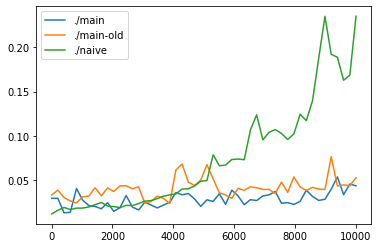

In [41]:
plot_time('tests/repeat_3_big_sigma', 5)

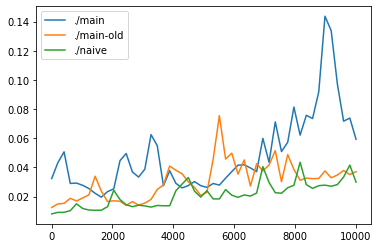

In [42]:
plot_time('tests/repeat_3_mid_k', 5)

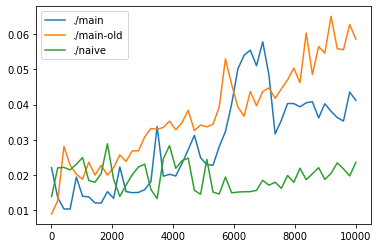

In [43]:
plot_time('tests/repeat_3_small_k', 15)

In [44]:
### Testowanie zależności czasu od $k$

In [45]:
def plot_time_for_k(generator, m, tests):
    for algorithm in ['./main', './main-old']:
        ks = np.linspace(0, m, 50, dtype=int)
        times = [measure_time(generator, algorithm, m, tests, k) for k in ks]
        plt.plot(ks, times, label=algorithm)
    plt.legend()

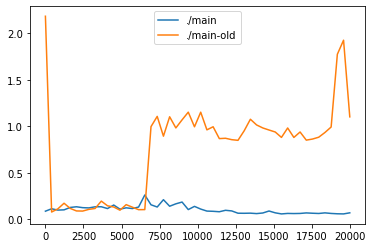

In [46]:
plot_time_for_k('tests/cyclic', 20000, 1)

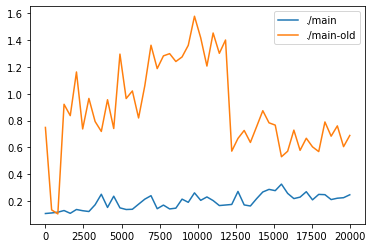

In [47]:
plot_time_for_k('tests/cyclic_binomial', 20000, 1)